The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5
continuous attributes

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

<hr>

Import and warehouse data:

<em>Import all the given datasets and explore shape and size.

<em>Merge all datasets onto one and explore final shape and size.

<em>Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use
Import the data from above steps into python.

In [73]:
# importing all relevant libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

In [74]:
# importing individual datasets and checking shape
df1 = pd.read_csv('Carname.csv')
df2 = pd.read_json('CarAttributes.json')
print(f"df1 shape: {df1.shape}")
print(f"df2 shape: {df2.shape}")

# Both the datasets contain the same nnumber of rows. We can concat the datasets into one df

df1 shape: (398, 1)
df2 shape: (398, 8)


In [75]:
# combining the datasets into one and exploring head and shape

df = pd.concat([df1, df2], axis=1)
print(f"df shape: {df.shape}")
df.head()

# Successfully combined the datasets; except for car name all columns are numerical columns

df shape: (398, 9)


car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1

In [76]:
# exporting the combined dataset to various file types

df.to_csv('city-cycle fuel consumption.csv', index=False)
df.to_excel('city-cycle fuel consumption.xlsx', index=False)
df.to_json('city-cycle fuel consumption.json')

<hr>

2. Data cleansing

<em>Missing/incorrect value treatment

<em>Perform another kind of corrections/treatment on the data.

<em>Drop attribute/s if required using relevant functional knowledge

In [77]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("part1_eda.html")

In [78]:
df.head(3)

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1

In [79]:
df.info()

# It appears from this table that there are no null values.
# car name does not add values to the dataset and can be dropped
# hp is a numerical column (as seen in df.head) but here it is object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [80]:
# car names does not add value hence dropping from dataset
df.drop("car_name", axis=1, inplace=True)

In [81]:
# checking the number of null values by column
df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [82]:
#  as column hp is marked as object despite being a numberical column - we will explore this column further

df.hp.unique()

# we can see invalid character "?" in the column

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [83]:
# extracting all rows where hp is ?

df[df.hp == "?"]

# there are 6 rows where HP == ?

mpg  cyl   disp hp    wt   acc  yr  origin
32   25.0    4   98.0  ?  2046  19.0  71       1
126  21.0    6  200.0  ?  2875  17.0  74       1
330  40.9    4   85.0  ?  1835  17.3  80       2
336  23.6    4  140.0  ?  2905  14.3  80       1
354  34.5    4  100.0  ?  2320  15.8  81       2
374  23.0    4  151.0  ?  3035  20.5  82       1

In [84]:
# force converting the column type to number

df["hp"] = pd.to_numeric(df["hp"], errors='coerce')
df[df.hp.isnull()]

# from the below table we can see that there are 6 rows, of which 5 rows have cyl == 4, and 1 row has cyl = 6

mpg  cyl   disp  hp    wt   acc  yr  origin
32   25.0    4   98.0 NaN  2046  19.0  71       1
126  21.0    6  200.0 NaN  2875  17.0  74       1
330  40.9    4   85.0 NaN  1835  17.3  80       2
336  23.6    4  140.0 NaN  2905  14.3  80       1
354  34.5    4  100.0 NaN  2320  15.8  81       2
374  23.0    4  151.0 NaN  3035  20.5  82       1

In [85]:
# in order to impute these null values, we wil understand the column further
df[df["cyl"] == 4]["hp"].describe()

# we see that the mean and median are almost at the same point so we will assumee that null values can be replaced with mean value of the respective cylinder type colun

count    199.000000
mean      78.281407
std       14.523099
min       46.000000
25%       68.000000
50%       78.000000
75%       88.000000
max      115.000000
Name: hp, dtype: float64

In [86]:
df[df["cyl"] == 6]["hp"].describe()

count     83.000000
mean     101.506024
std       14.310472
min       72.000000
25%       92.500000
50%      100.000000
75%      110.000000
max      165.000000
Name: hp, dtype: float64

In [87]:
#  replacing the null hp values with the average hp value groupy by cylinder
df.loc[(df.hp.isnull()) & (df.cyl == 4),'hp']= round(df[df["cyl"] == 4]["hp"].mean())
df.loc[(df.hp.isnull()) & (df.cyl == 6),'hp']= round(df[df["cyl"] == 6]["hp"].mean())
df.isnull().sum()

# there are no null values

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [88]:
# as we dropped car name, there 8 columns and we have retained all the rows from the original dataset
df.shape

(398, 8)

In [89]:
df.info()

# all columns are numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [90]:
df.duplicated().sum()

# there are no duplicate rows

0

In [91]:
df.describe(include="all").T
# meam and median for most of the columns are approx at the same point
# no issues with min and max values 

count         mean         std     min       25%     50%       75%  \
mpg     398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   
cyl     398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp    398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
hp      398.0   104.130653   38.313213    46.0    76.000    92.0   125.000   
wt      398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc     398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr      398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
origin  398.0     1.572864    0.802055     1.0     1.000     1.0     2.000   

           max  
mpg       46.6  
cyl        8.0  
disp     455.0  
hp       230.0  
wt      5140.0  
acc       24.8  
yr        82.0  
origin     3.0

<hr>

3. Data analysis & visualisation:

<em>Perform detailed statistical analysis on the data.

<em>Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create
your own features if required. Be highly experimental and analytical here to find hidden patterns.

In [92]:
# defining a function to automate univariate numerical analysis

def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(df[column], kind='hist', color='g');
    plt.show()

    plt.figure()
    print("KDE of " + column)
    print("----------------------------------------------------------------------------")
    sns.kdeplot(df[column], color='g', fill=True);
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column], color='g')
    plt.show()
    
    print("============================================================================")


In [93]:
# creating a function to automate outlier treatment

def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

Description of mpg
----------------------------------------------------------------------------
count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64 Distribution of mpg
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

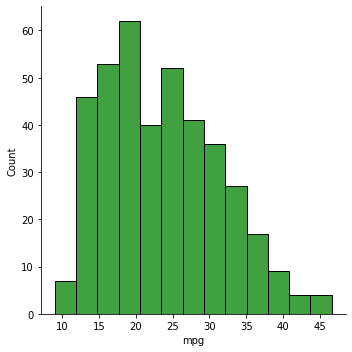

KDE of mpg
----------------------------------------------------------------------------


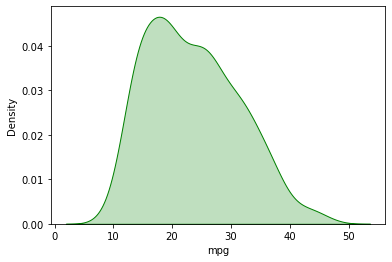

BoxPlot of mpg
----------------------------------------------------------------------------


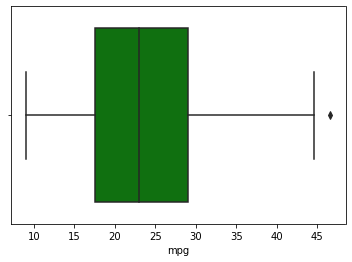

Description of cyl
----------------------------------------------------------------------------
count    398.000000
mean       5.454774
std        1.701004
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cyl, dtype: float64 Distribution of cyl
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

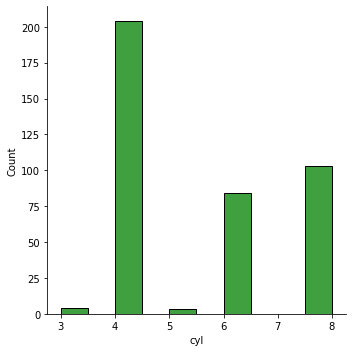

KDE of cyl
----------------------------------------------------------------------------


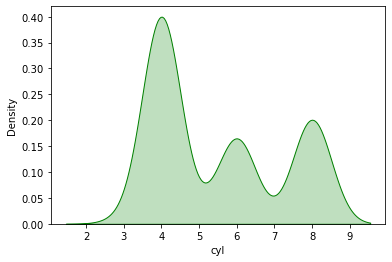

BoxPlot of cyl
----------------------------------------------------------------------------


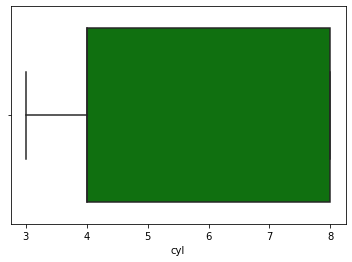

Description of disp
----------------------------------------------------------------------------
count    398.000000
mean     193.425879
std      104.269838
min       68.000000
25%      104.250000
50%      148.500000
75%      262.000000
max      455.000000
Name: disp, dtype: float64 Distribution of disp
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

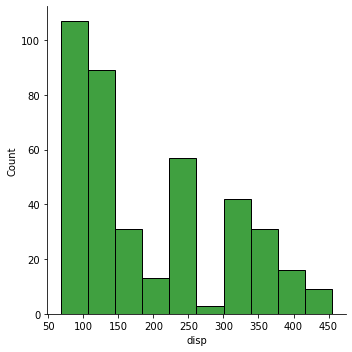

KDE of disp
----------------------------------------------------------------------------


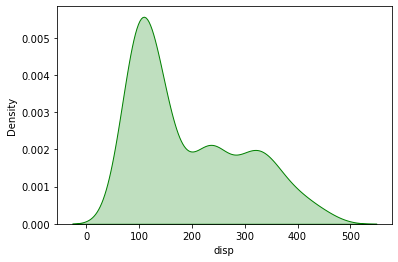

BoxPlot of disp
----------------------------------------------------------------------------


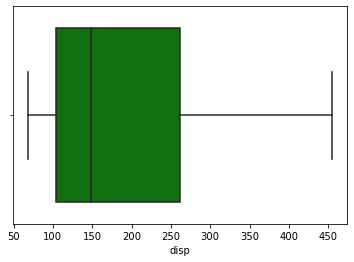

Description of hp
----------------------------------------------------------------------------
count    398.000000
mean     104.130653
std       38.313213
min       46.000000
25%       76.000000
50%       92.000000
75%      125.000000
max      230.000000
Name: hp, dtype: float64 Distribution of hp
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

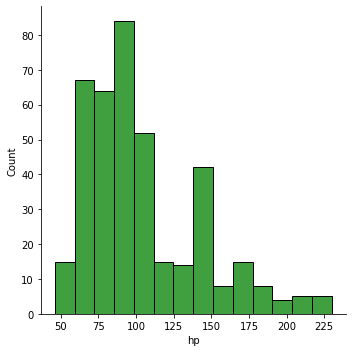

KDE of hp
----------------------------------------------------------------------------


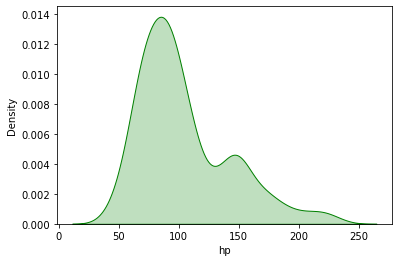

BoxPlot of hp
----------------------------------------------------------------------------


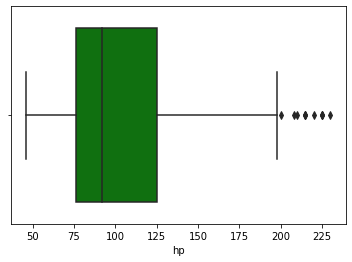

Description of wt
----------------------------------------------------------------------------
count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: wt, dtype: float64 Distribution of wt
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

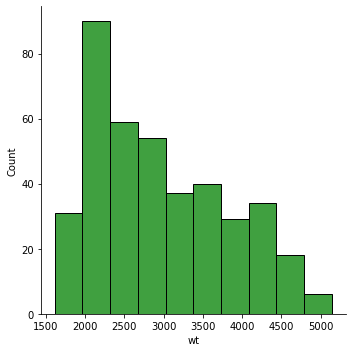

KDE of wt
----------------------------------------------------------------------------


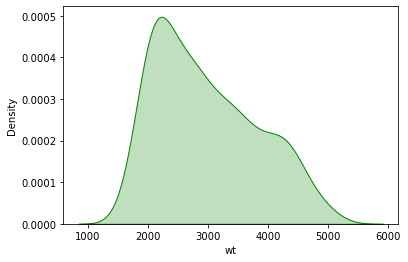

BoxPlot of wt
----------------------------------------------------------------------------


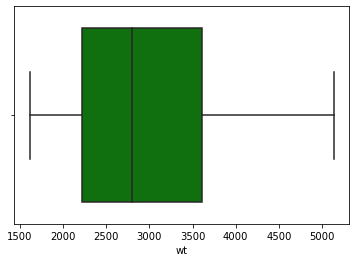

Description of acc
----------------------------------------------------------------------------
count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acc, dtype: float64 Distribution of acc
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

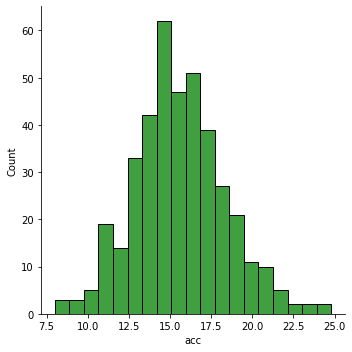

KDE of acc
----------------------------------------------------------------------------


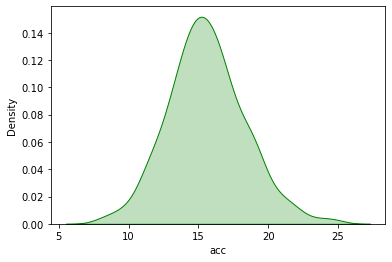

BoxPlot of acc
----------------------------------------------------------------------------


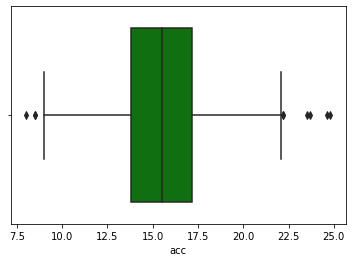

In [94]:
# performing univariate on all columns except year and origin

for i in df.columns[:-2]:
    univariateAnalysis_numeric(i, 20)
    
# mpg: the column is more or less distributed symmetically, with a slight right skew. There are few outliers and we can treat using the above function
# cyl: this is an ordinal numerical column. No significant outlier issue
# disp: follows a similar behavior as cyl, as displ is correlated to number of cylinders in a car. No significant outlier issue
# hp: the column has a slight right skew. There are few outliers and we can treat using the above function
# wt: No significant outlier issue
# acc: normally distributed but has outliers. We will treat the outliers.
# Overall the data looks normally distributed (with slight right skew), except for few outliers. We will treat the outliers so that it does not affect our data analysis

Description of mpg
----------------------------------------------------------------------------
count    398.000000
mean      23.490528
std        7.759300
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       44.600000
Name: mpg, dtype: float64 Distribution of mpg
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

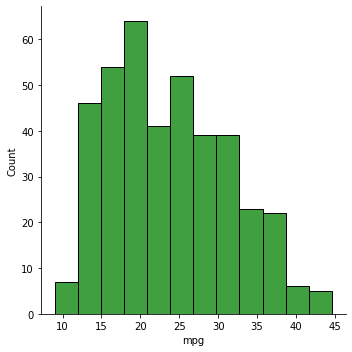

KDE of mpg
----------------------------------------------------------------------------


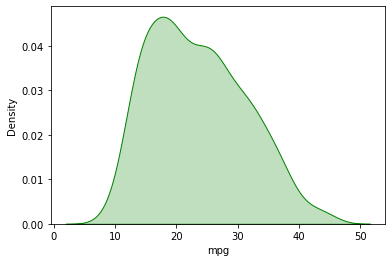

BoxPlot of mpg
----------------------------------------------------------------------------


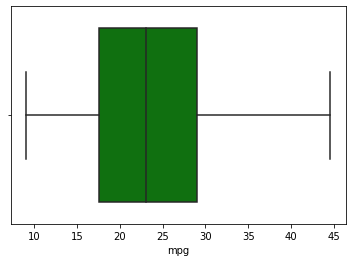

Description of hp
----------------------------------------------------------------------------
count    398.000000
mean     103.105528
std       35.647857
min       46.000000
25%       76.000000
50%       92.000000
75%      125.000000
max      198.000000
Name: hp, dtype: float64 Distribution of hp
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

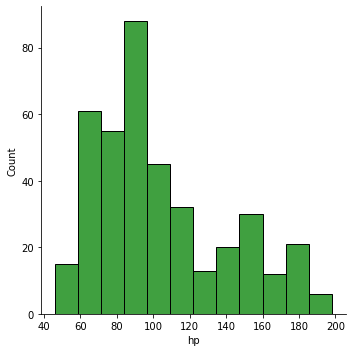

KDE of hp
----------------------------------------------------------------------------


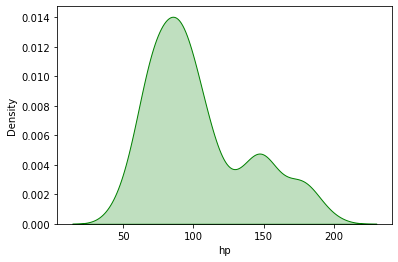

BoxPlot of hp
----------------------------------------------------------------------------


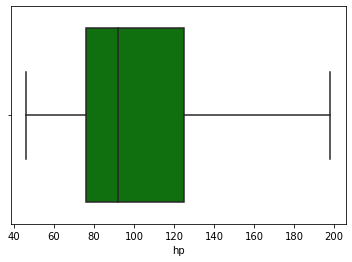

Description of acc
----------------------------------------------------------------------------
count    398.000000
mean      15.543832
std        2.595228
min        9.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       22.100000
Name: acc, dtype: float64 Distribution of acc
----------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

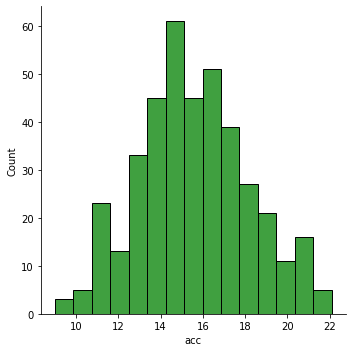

KDE of acc
----------------------------------------------------------------------------


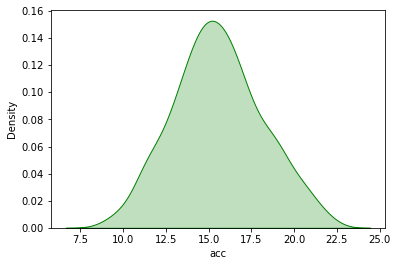

BoxPlot of acc
----------------------------------------------------------------------------


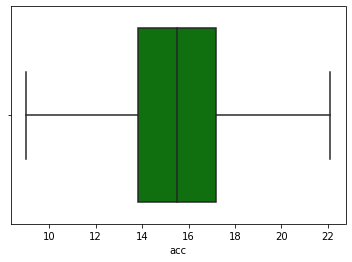

In [95]:
df["mpg"] = treat_outlier(df["mpg"])
df["hp"] = treat_outlier(df["hp"])
df["acc"] = treat_outlier(df["acc"])

univariateAnalysis_numeric("mpg", 20)
univariateAnalysis_numeric("hp", 20)
univariateAnalysis_numeric("acc", 20)

In [96]:
# create a copy of df
df1 = df.copy(deep=True)

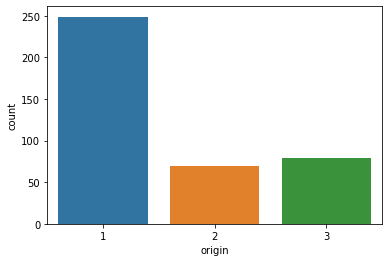

In [97]:
sns.countplot(data=df1, x=df1["origin"]);

#  country 1 is dominant
#  while the column in numerical, the column is not ordinal ie we cannot assume that the origin 2 is greater than origin 1. 
# This is the most likely region of these cars and it will make sense to transform these to categorical variables and then creating dummy variables

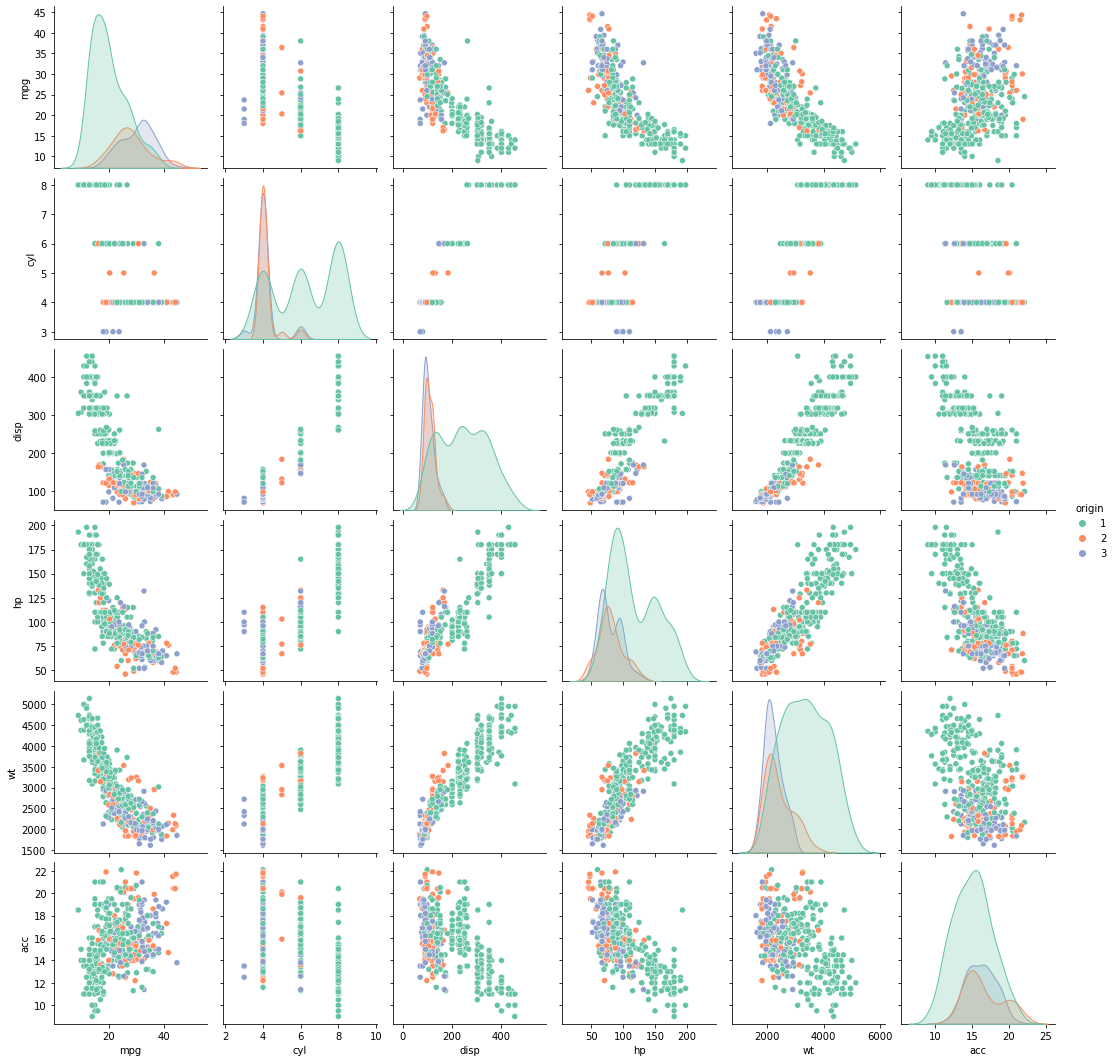

In [98]:
# exploring using pair plot to understand correlations based on origin
sns.pairplot(df1[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc',"origin"]],hue="origin", palette="Set2");

# there are clear correlation between mpg and (disp, hp, weight)
# there are clear correlation between disp and (hp, weight)
# origin 1 is dominant amoung all origins

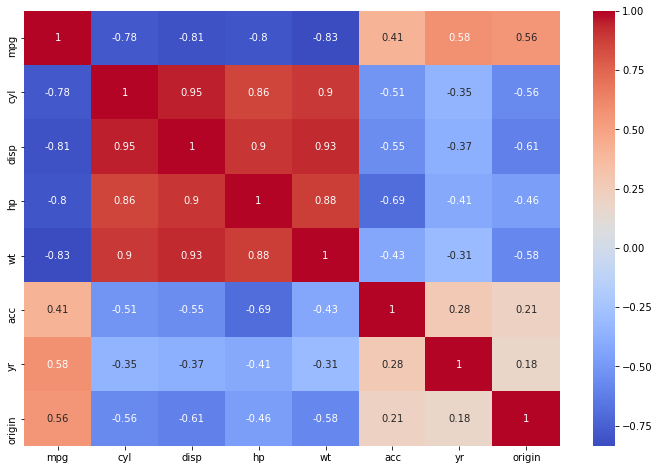

In [99]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm');

# there are clear corelations among features

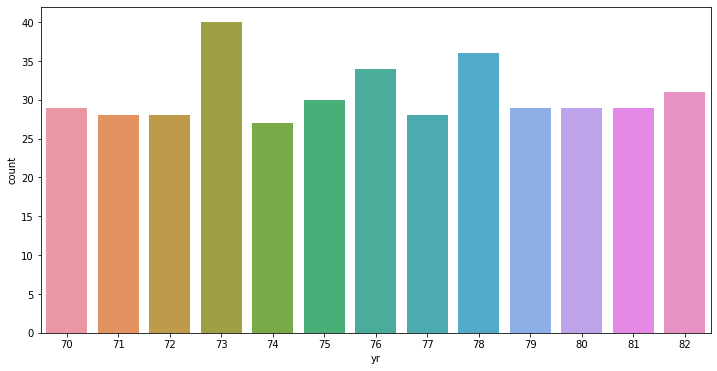

In [100]:
plt.figure(figsize=(12,6))
sns.countplot(data=df1,x='yr');

# the distribution is quite uniform for years (exception being 73)

In [101]:
#  while the column in numerical, the column is not ordinal ie we cannot assume that the origin 2 is greater than origin 1. This is the most likely region of these cars and it will make sense to transform these to categorical variables
df["origin"].replace({
    1:  "Country A",
    2: "Country B",
    3: "Country C"
},inplace=True)

<hr>

Machine learning:

<em>Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.
Share your insights about the difference in using these two methods.

In [102]:
# creating dummy variables for alogorithm
# as we are using unsupervised alogorithm, we dont have to worry about dropping the first dummy column

df = pd.get_dummies(df)
df.head()

mpg  cyl   disp     hp    wt   acc  yr  origin_Country A  \
0  18.0    8  307.0  130.0  3504  12.0  70                 1   
1  15.0    8  350.0  165.0  3693  11.5  70                 1   
2  18.0    8  318.0  150.0  3436  11.0  70                 1   
3  16.0    8  304.0  150.0  3433  12.0  70                 1   
4  17.0    8  302.0  140.0  3449  10.5  70                 1   

   origin_Country B  origin_Country C  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [103]:
# creating a copy of the dataframe
X = df.copy(deep=True)

In [104]:
# as the featureset is in different scale and clustering algorithms use distance measure, we will scale features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [105]:
# we will us ethe elbow method, silhouette_score and try to find optimal number of clusters
# Checking for clusters ranging from 2 to 14 and view the impact on sum of squared errors

ssd = []
sil_coef = []

for k in range(2,15):
    
    model = KMeans(n_clusters=k, random_state=101)
    model.fit(scaled_X)
    ssd.append(model.inertia_)
    score = silhouette_score(scaled_X,model.labels_)
    sil_coef.append(score)

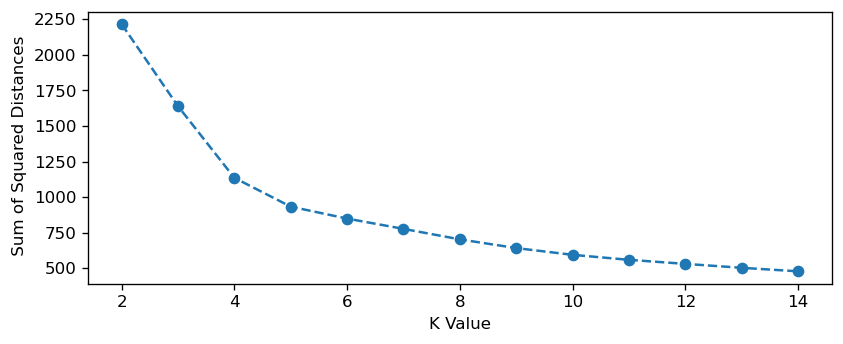

In [106]:
# creating a graph to plot the sum of squared errors vs the number of clusters

plt.figure(figsize=(8,3),dpi=120)
plt.plot(range(2,15),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances");

In [107]:
# checking the loss in ssd during each cluster value
pd.Series(ssd).diff()

0            NaN
1    -576.353139
2    -503.436490
3    -202.336326
4     -83.952183
5     -72.216021
6     -73.829639
7     -61.149046
8     -47.521750
9     -35.065210
10    -28.479560
11    -27.636207
12    -24.647619
dtype: float64

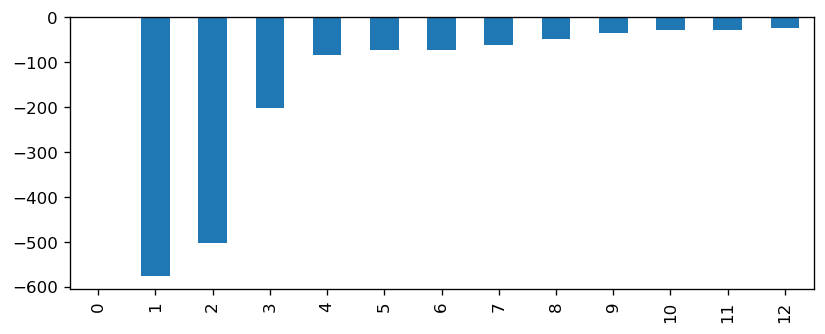

In [108]:
# visualizing he above in bar plot
plt.figure(figsize=(8,3),dpi=120)
pd.Series(ssd).diff().plot(kind='bar');

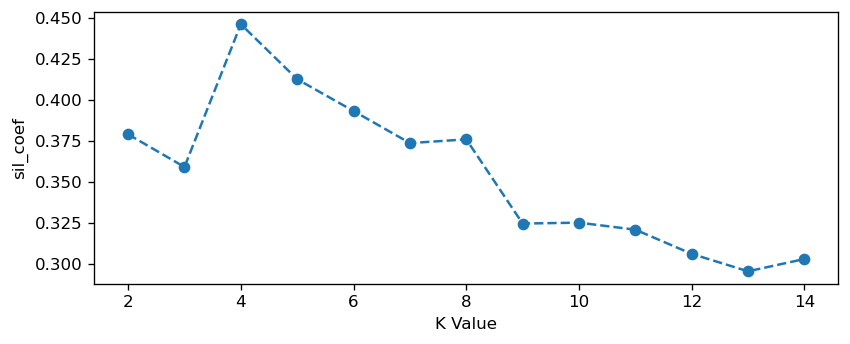

In [109]:
plt.figure(figsize=(8,3),dpi=120)
plt.plot(range(2,15),sil_coef,'o--')
plt.xlabel("K Value")
plt.ylabel("sil_coef");

# silhouette_score is max at k=4

In [110]:
# looking at the above charts, we can make reasonable assumption that there could be 4 clusters in the dataset

In [111]:
model = KMeans(n_clusters=4, random_state=101)
model.fit(scaled_X)

KMeans(n_clusters=4, random_state=101)

<AxesSubplot:>

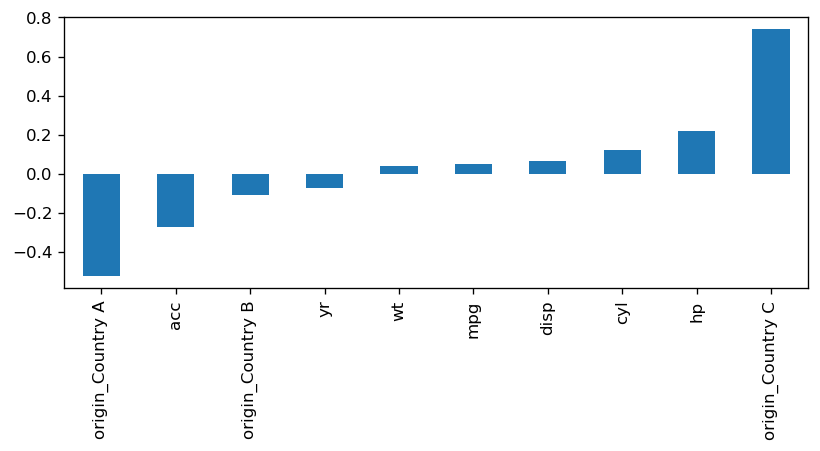

In [112]:
# adding the cluster labels back to the dataset X and we will check the feature corelations or the features that have highest impact on the clusters
X["K = 4"] = model.labels_
plt.figure(figsize=(8,3),dpi=120)
X.corr()['K = 4'].iloc[:-1].sort_values().plot(kind='bar')

In [113]:
silhouette_score(scaled_X,model.labels_)

0.44614362087105824

In [114]:
# from the below table, we can see that the features

X.corr()["K = 4"].sort_values()[:-1]

# we see that the cluster are heavily inlfuenced by origin, mpg, wt

origin_Country A   -0.524705
acc                -0.272404
origin_Country B   -0.109109
yr                 -0.073985
wt                  0.039553
mpg                 0.048593
disp                0.066355
cyl                 0.119165
hp                  0.217545
origin_Country C    0.740792
Name: K = 4, dtype: float64

In [115]:
# creating a copy of df for hierarcial clustering
X = df.copy(deep=True)

In [116]:
# we are scaling the data to bring all featues on the same scale and this time we are using min max scaler 
# so that the min and max scaled values are between 0 and 1. 
# This will help determine a starting point for distance threshold later

scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(X)

In [117]:
scaled_df = pd.DataFrame(scaled_feat,columns=X.columns)
scaled_df.describe()

# we can see that all the values have a min and max values of 0 and 1 respectively

mpg         cyl        disp          hp          wt         acc  \
count  398.000000  398.000000  398.000000  398.000000  398.000000  398.000000   
mean     0.407037    0.490955    0.324098    0.375694    0.384867    0.499529   
std      0.217958    0.340201    0.269431    0.234525    0.240103    0.198109   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.238764    0.200000    0.093669    0.197368    0.173164    0.368321   
50%      0.393258    0.200000    0.208010    0.302632    0.337539    0.496183   
75%      0.561798    1.000000    0.501292    0.519737    0.565637    0.624046   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               yr  origin_Country A  origin_Country B  origin_Country C  
count  398.000000        398.000000        398.000000        398.000000  
mean     0.500838          0.625628          0.175879          0.198492  
std      0.308136          0.484569          0.381197          0.399367  
min      0.000000          0.000000          0.000000          0.000000  
25%      0.250000          0.000000          0.000000          0.000000  
50%      0.500000          1.000000          0.000000          0.000000  
75%      0.750000          1.000000          0.000000          0.000000  
max      1.000000          1.000000          1.000000          1.000000

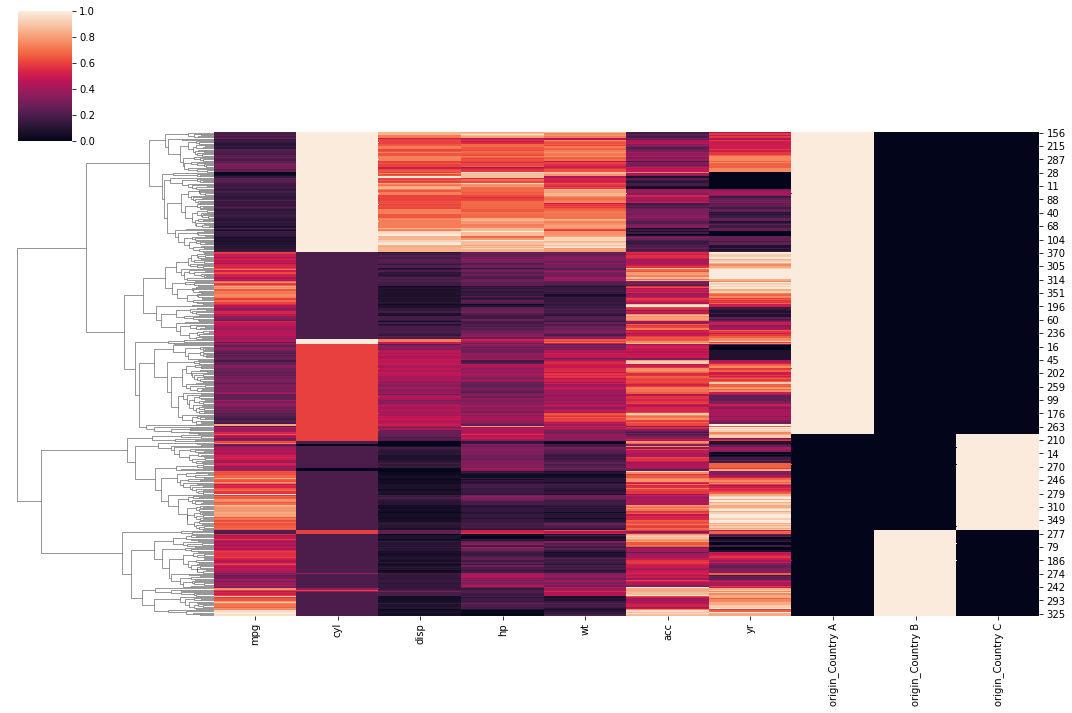

In [118]:
sns.clustermap(scaled_df,col_cluster=False, figsize=(15, 10));

# we can a clear distribution for origin columns as these are binany values
# we also see a sepration in the cyl as this is oridinal
# the higher clusters appear to be similar to the origin columns, gving an indication that these could play a major role in deciding clusters

In [119]:
# we will use to Agglomerative Clustering with the kmeans cluster value of 4, view the dendogram and impact of cluster labels on the varios scatter plots

model = AgglomerativeClustering(n_clusters=4)
cluster_labels = model.fit_predict(scaled_df)
X["cluster"] = cluster_labels

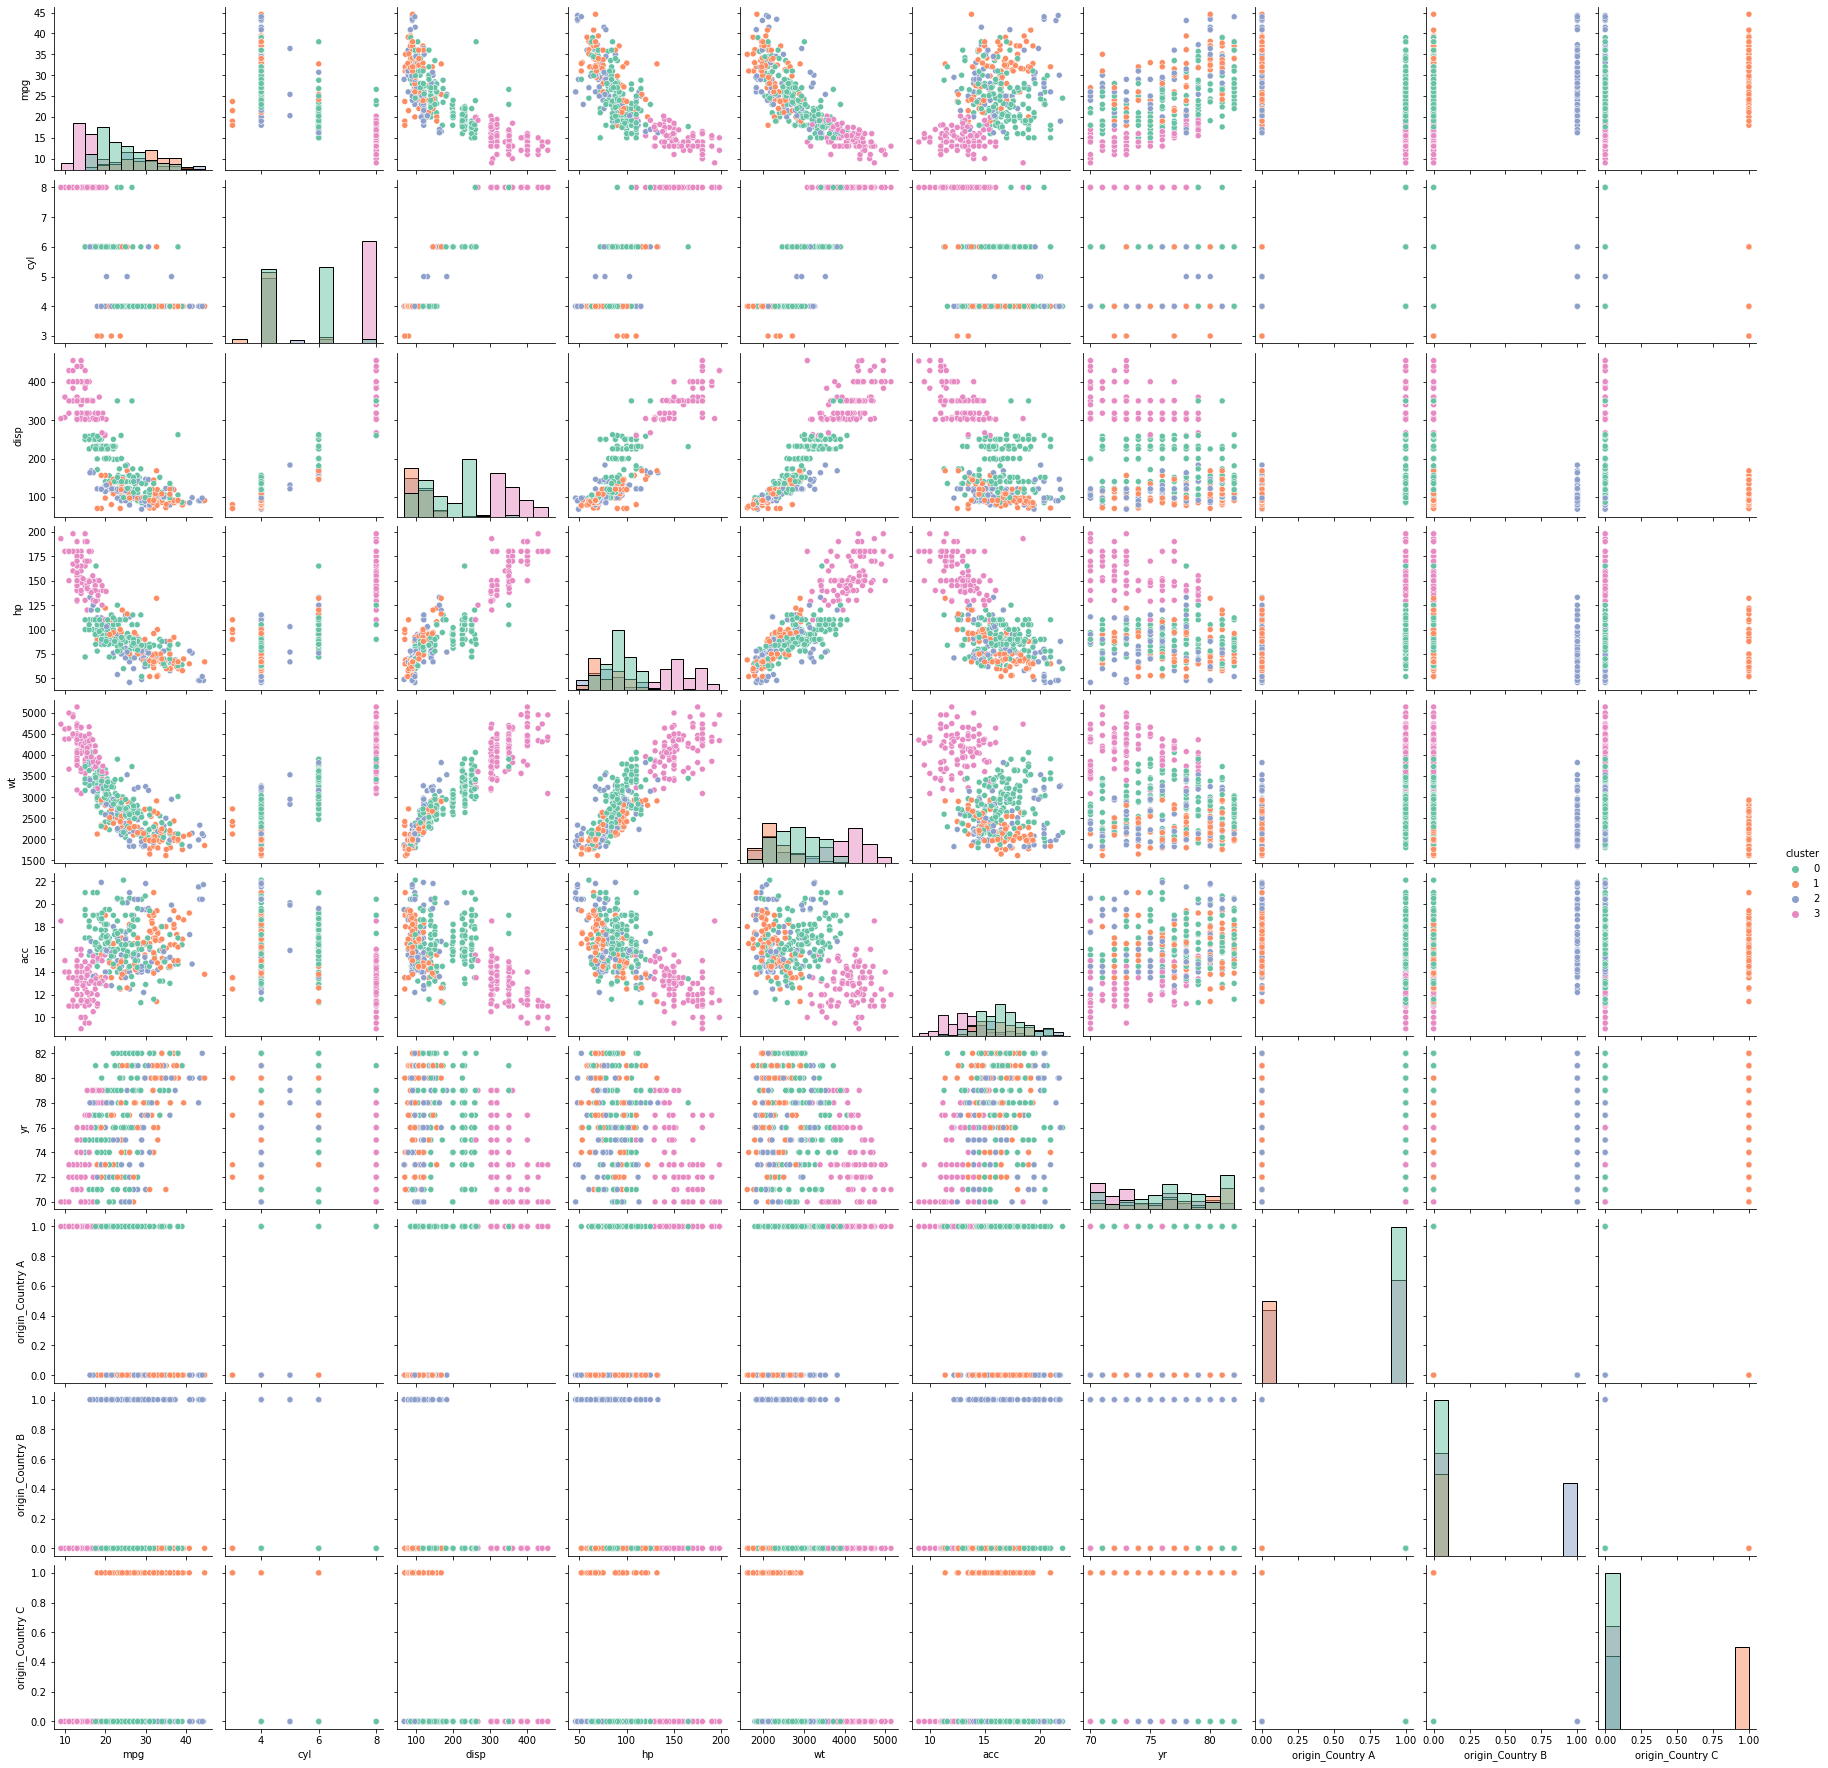

In [120]:
sns.pairplot(data=X,hue="cluster", diag_kind='hist',palette="Set2");

# from the below scatter charts, we can see clear separation of clusters for eg, disp vs wt, all the four clusters are distinctly seen.

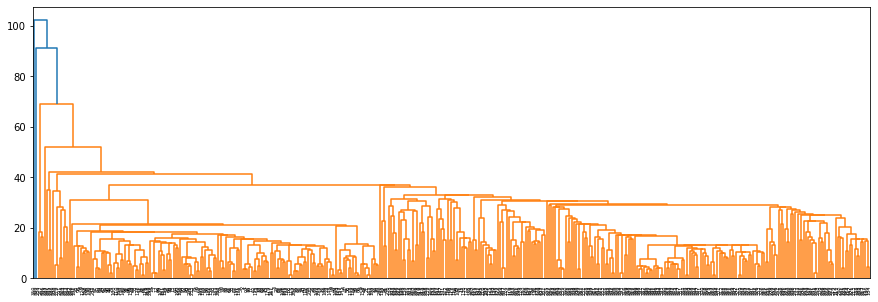

In [121]:
# exploring the dendogram without any truncation
linkage_matrix = hierarchy.linkage(model.children_)
plt.figure(figsize=(15,5))
dendm = dendrogram(linkage_matrix)

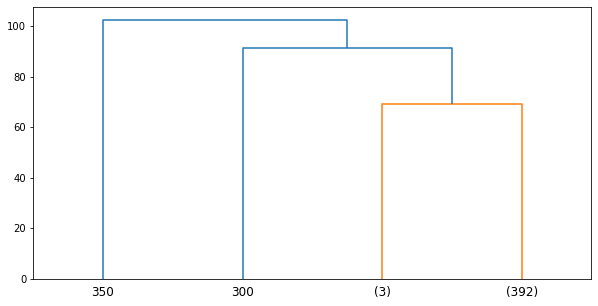

In [122]:
# exploring the dendogram with 4 clusters
linkage_matrix = hierarchy.linkage(model.children_)
plt.figure(figsize=(10,5))
dendm = dendrogram(linkage_matrix, truncate_mode='lastp',p=4)

In [123]:
# as we have used min max scalar, the max distance between two points willbe squareroot of the number of columns as defined in Euclidean distance measure
# based on the analysis performed till now, we assuem that MPG is a signifcant metric and has influence on the data. 
# This metric will help us determine the distance threshold to be used in Agglomerative Clustering

In [124]:
print(f"Index of car with max mpg is at loc {scaled_df['mpg'].idxmax()}")
print(f"Index of car with max mpg is at loc {scaled_df['mpg'].idxmin()}")

Index of car with max mpg is at loc 329
Index of car with max mpg is at loc 28


In [125]:
# we can use linear algebra to find the distance between these two cars

car_a = scaled_df.iloc[scaled_df['mpg'].idxmax()]
car_b = scaled_df.iloc[scaled_df['mpg'].idxmin()]
dist = np.linalg.norm(car_a-car_b)
print(f"distance between the car a and car b is {dist}")

distance between the car a and car b is 2.4740533779332625


In [126]:
# as we are using min max scaler, the max and min values are known, and since we are using eucledian distance, which essentially is the pythorgous therem. the max distance could be around the squareroot of the number of columsn in the feature set

print(f"the max distance between two points could be around {np.sqrt(len(scaled_df.columns))}")

the max distance between two points could be around 3.1622776601683795


In [127]:
# based on the above two distances we can safely start our distance threshold values around 2 or 3

In [128]:
# we will now run a loop with distance threshold ranging from 2 to 10, and try to determine the number of potential clusters present in the dataset

for i in range(2,11):
    
    model = AgglomerativeClustering(n_clusters=None,distance_threshold=i)
    cluster_labels = model.fit_predict(scaled_feat)
    
    p = len(np.unique(cluster_labels))
    
    X['Cluster'] = cluster_labels
    print(f"Number of Clusters (distance threshold {i}): {p}  ")

Number of Clusters (distance threshold 2): 11  
Number of Clusters (distance threshold 3): 9  
Number of Clusters (distance threshold 4): 5  
Number of Clusters (distance threshold 5): 5  
Number of Clusters (distance threshold 6): 4  
Number of Clusters (distance threshold 7): 4  
Number of Clusters (distance threshold 8): 4  
Number of Clusters (distance threshold 9): 4  
Number of Clusters (distance threshold 10): 4  


In [129]:
# we can see a pattern of the around 4 clusters and this is the same as we found in Kmeans clustering also. We can assume that there are 4 clusters in the dataset

5. Answer below questions based on outcomes of using ML based methods.

• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

• Use linear regression model on different clusters separately and print the coefficients of the models individually

• How using different models for different clusters will be helpful in this case and how it will be different than using one single model without clustering? Mention how it impacts performance and prediction.

In [130]:
# From the above analysis, it appears that there are 4 clusters of cars in the dataset, and these could be inlfuenced by the origin and the efficieny of the cars

In [131]:
# we will use k means to generate dataframes with cluster values ranging from 3 to 10
# we will then use Linear regression to find the coefficients for each cluster model
# as we have used dummy variables and to prevent impact on coeffiencets, we wil drop origin_Country C column
# we will do the above using a for loop


X = df.copy(deep=True)
co_eff_table = pd.DataFrame(index=X.columns[:-1])

for i in range(3,11):
    
    X = df.copy(deep=True) # creating a copy of the data set for liner regression and to find the coeff
    
    scaler = StandardScaler() # scaling the data so that all are at the same level
    scaled_X = scaler.fit_transform(X)
    
    model = KMeans(n_clusters=i, random_state=101)
    model.fit(scaled_X)
    X['cluster'] = model.labels_
    regress_mod = X
    
    X = regress_mod.drop(["cluster", "origin_Country C"], axis=1)
    y = regress_mod['cluster']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    test_predictions = model.predict(X_test)
    
    co_eff_table[f"Cluster = {i}"] = model.coef_

print(f'Below are the feature-wise coeff for various clusters models:')
co_eff_table

Below are the feature-wise coeff for various clusters models:


Cluster = 3  Cluster = 4  Cluster = 5  Cluster = 6  \
mpg                  0.025475     0.025475     0.026144    -0.031523   
cyl                  0.218735     0.218735     0.483538     0.099231   
disp                 0.002165     0.002165     0.004669     0.006514   
hp                   0.012847     0.012847     0.011322    -0.037672   
wt                  -0.000102    -0.000102    -0.000036    -0.000076   
acc                  0.000584     0.000584    -0.019487     0.043553   
yr                  -0.016404    -0.016404    -0.043050     0.020570   
origin_Country A    -1.105715    -3.105715    -3.043944    -1.884786   
origin_Country B     0.012415    -1.987585    -1.060657     1.757043   

                  Cluster = 7  Cluster = 8  Cluster = 9  Cluster = 10  
mpg                 -0.134600    -0.214299    -0.151691     -0.044944  
cyl                 -0.698169     0.068530    -0.730306     -0.346824  
disp                -0.012674    -0.008534     0.001450      0.016093  
hp                   0.009059    -0.042511     0.025391      0.020853  
wt                  -0.000444    -0.000187    -0.000661     -0.001125  
acc                 -0.022454     0.013450    -0.036544      0.047010  
yr                  -0.037946    -0.098657    -0.239668     -0.447880  
origin_Country A     2.970608     2.026828    -0.853335     -1.728782  
origin_Country B     2.635180     1.392577     1.556238      0.128922

In [134]:
# we can see the effect of coeffecient diminihes wth increase in increase in clusters
# the cyl, origin, mpg column appears to have larger impact on the model

In [132]:
# as we are using unsupervised algorithm, there is no target label or an accuracy measure to vaerify our model against, and therefore, we need to bring in domain experince and play around with various models so that we can make a reasonaable judgement about the number of clusters present in the dataset. 
# Clustering helps us find groupings or connections between data points of a dataset and without a clustering technique.
#  Regrding predictions and performance, there is no way to really check the performne of our predictions as there is no target variable.
# we use clustering methods to understand the data better and then based on domain knowledge, make reasonable conclusions about the dataset.

Improvisation:

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to perform a better data analysis in future.

In [133]:
# the dataset set contains around 300+ rows and our model is based on the current dataset. 
# Having access to more data will help explain variance in the dataset and also make our prediction better. 
# The data qulity is better, with an exception of few invalid characters in mpg column. 
# Origin details have been masked, and if the origion details are present, we may be able to make domain specific observations on the number of clusters. 
# The data has been providede as an ecel but our model will performn well if there is a continous flow of a data flowing into our model. 
# The dataset is available in different sources (in multiple csv files), and consolidation of data will be helpful.
# this dataset in a very old one and our predications may not be relevant in the current technological age.